In [1]:
import pandas as pd

In [45]:
def get_most_active_users(df, n=10):
    return df.groupby("user_id")["id"].count().sort_values(ascending=False).head(n)

In [46]:
def get_revisions_with_tags(df):
    return df[df["tags"].str.len() > 0]

In [47]:
def get_most_common_tags(df, n=10):
    return (
        df.explode("tags")
        .reset_index(drop=True)
        .groupby("tags")["id"]
        .count()
        .sort_values(ascending=False)
        .head(n)
    )

# For Page 1

In [48]:
lego_df = pd.read_json("../data/Lego.json")

In [49]:
get_most_active_users(lego_df)

user_id
0           3284
2175470      394
13286072     162
455421       132
26032994     113
638345        87
12683541      80
4928500       75
382591        63
6326132       59
Name: id, dtype: int64

In [50]:
with_tags = get_revisions_with_tags(lego_df)

In [51]:
tag_counts = get_most_common_tags(with_tags)

In [52]:
tag_counts.head(10)

tags
mobile edit             99
visualeditor            89
mobile web edit         82
wikieditor              57
blanking                36
Section blanking        23
repeating characters    19
AWB                     16
references removed      14
mw-undo                 11
Name: id, dtype: int64

<Axes: xlabel='tags'>

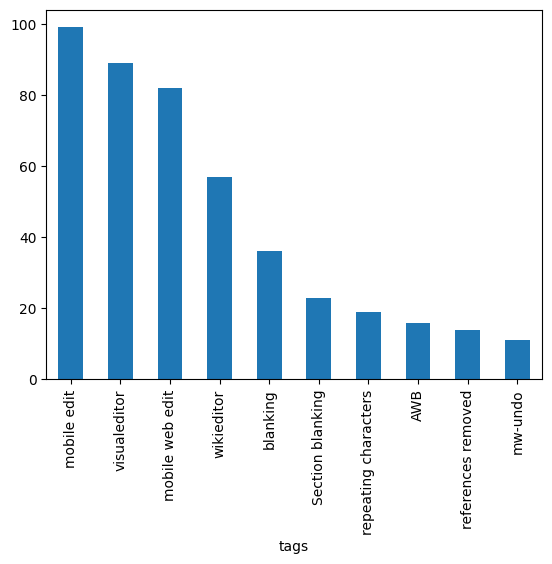

In [53]:
tag_counts.head(10).plot.bar()

# For Page 2

In [54]:
star_wars_df = pd.read_json("../data/Lego Star Wars.json")

In [55]:
get_most_active_users(star_wars_df)

user_id
0           735
39252742    192
1173535      48
13286072     28
13760575     20
1670216      16
2175470      16
35498457     16
10863197     14
118328       11
Name: id, dtype: int64

In [56]:
with_tags_sw = get_revisions_with_tags(star_wars_df)

In [57]:
tag_counts_sw = get_most_common_tags(with_tags_sw)

In [58]:
tag_counts_sw.head(10)

tags
mobile edit             189
mobile web edit         171
wikieditor              157
visualeditor             89
mw-reverted              71
mw-rollback              33
advanced mobile edit     29
mw-undo                  25
mobile app edit          17
mw-manual-revert         14
Name: id, dtype: int64

<Axes: xlabel='tags'>

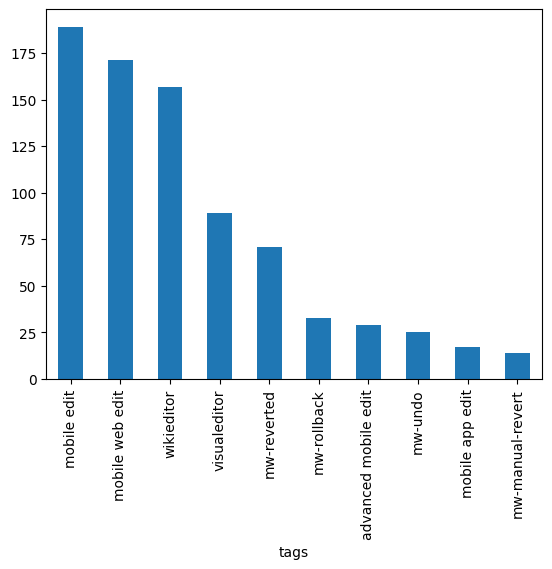

In [59]:
tag_counts_sw.head(10).plot.bar()

In [62]:
star_wars_df["date"].diff().mean()

Timedelta('3 days 13:11:28.179921037')

In [63]:
lego_df["date"].diff().mean()

Timedelta('0 days 22:15:06.223383484')

In [65]:
lego_df["date"].diff().median()

Timedelta('0 days 00:55:41')

In [66]:
lego_df["date"].diff().max()

Timedelta('185 days 14:01:12')